In [31]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

Loading and Preprocessing MNIST dataset


In [7]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()


**Normalize pixel Values**

In [8]:
x_train, x_test = x_train / 255.0, x_test / 255.0

Reshape to Odd channel Dimention

In [9]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

**Build The CNN Model**

In [12]:
model = models.Sequential ([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation= 'relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**Compile The Modek**


In [ ]:
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",  # since y_train has shape (60000,)
    metrics=["accuracy"]
)


In [20]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 365,792 (1.40 MB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 243,862 (952.59 KB)

**Train The Model**

In [22]:
history = model.fit(
    x_train, y_train,
    epochs=10,
    validation_data=(x_test, y_test)
)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9552 - loss: 0.1485 - val_accuracy: 0.9830 - val_loss: 0.0557
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9855 - loss: 0.0473 - val_accuracy: 0.9894 - val_loss: 0.0355
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9895 - loss: 0.0326 - val_accuracy: 0.9893 - val_loss: 0.0336
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9926 - loss: 0.0242 - val_accuracy: 0.9907 - val_loss: 0.0286
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9945 - loss: 0.0170 - val_accuracy: 0.9876 - val_loss: 0.0381
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9958 - loss: 0.0124 - val_accuracy: 0.9908 - val_loss: 0.0279
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9963 - loss: 0.0112 - val_accuracy: 0.9917 - val_loss: 0.0285
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9973 - loss: 0

Evaluate The Model

In [24]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose = 2)
print(f'\nTest accuracy: {test_acc:.4f}')
print(f'Test loss: {test_loss:.4f}')

313/313 - 1s - 2ms/step - accuracy: 0.9918 - loss: 0.0332

Test accuracy: 0.9918
Test loss: 0.0332


**Test The Model**


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


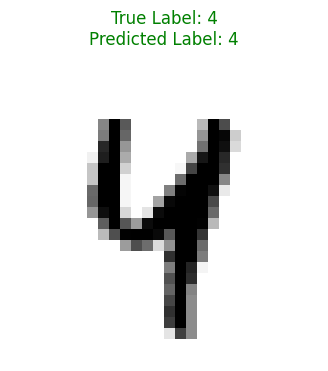

In [25]:
test_image = x_test[42]
true_label = y_test[42]

test_image_batch = np.expand_dims(test_image, axis=0)

predictions = model.predict(test_image_batch)
predicted_label = np.argmax(predictions[0])

plt.figure(figsize=(4, 4))

plt.imshow(test_image.squeeze(), cmap=plt.cm.binary)
plt.title(f"True Label: {true_label}\nPredicted Label: {predicted_label}", color=("green" if predicted_label == true_label else "red"))
plt.axis('off')
plt.show()

**Load Image**

In [39]:
path = "/Users/ayushgupta/Desktop/mnist/image.png"
img = tf.keras.utils.load_img(path, color_mode="grayscale", target_size=(28, 28))

1. Converting to Array
2. Normalize to [0,1]
3. Add Batch Dimention (1,28,28,1)

In [40]:
img_array = tf.keras.utils.img_to_array(img) #1
img_array = img_array / 255.0 #2
img_array = np.expand_dims(img_array, axis=0)

Show The Image With Prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


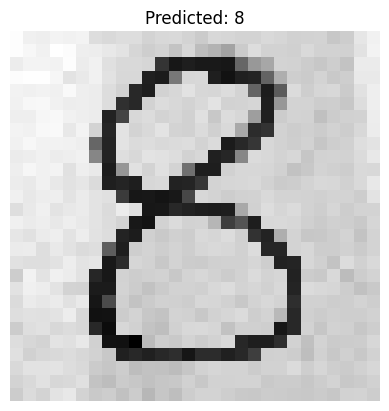

In [41]:
prediction = model.predict(img_array)
predicted_digit = np.argmax(prediction)

plt.imshow(img_array[0].squeeze(), cmap="gray")
plt.title(f"Predicted: {predicted_digit}")
plt.axis("off")
plt.show()